In [7]:
# importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('data_files/twitter_archive_master.csv')

In [9]:
df.head()

,p3,p1_conf,p2,p3_conf,timestamp,retweet_count,truncated,img_num,text,name,...,tweet_id,rating_numerator,jpg_url,p1_dog,retweeted,source,rating_denominator,p2_conf,p3_dog,dog_stages
0,Shetland Sheepdog,0.465074,Collie,0.061428,2015-11-15 22:32:08+00:00,532,False,1,Here we have a Japanese Irish Setter. Lost eye...,None,...,666020888022790149,8,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True,False,Twitter for iPhone,10,0.156665,True,None
1,Rhodesian Ridgeback,0.506826,Miniature Pinscher,0.072010,2015-11-15 23:05:30+00:00,48,False,1,This is a western brown Mitsubishi terrier. Up...,None,...,666029285002620928,7,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True,False,Twitter for iPhone,10,0.074192,True,None
2,Bloodhound,0.596461,Malinois,0.116197,2015-11-15 23:21:54+00:00,47,False,1,Here is a very happy pup. Big fan of well-main...,None,...,666033412701032449,9,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True,False,Twitter for iPhone,10,0.138584,True,None
3,Miniature Pinscher,0.408143,Redbone,0.222752,2015-11-16 00:04:52+00:00,147,False,1,This is a purebred Piers Morgan. Loves to Netf...,None,...,666044226329800704,6,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True,False,Twitter for iPhone,10,0.360687,True,None
4,Doberman,0.560311,Rottweiler,0.154629,2015-11-16 00:24:50+00:00,41,False,1,Here we have a 1949 1st generation vulpix. Enj...,None,...,666049248165822465,5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True,False,Twitter for iPhone,10,0.243682,True,None


In [10]:
sns.set_style('darkgrid')

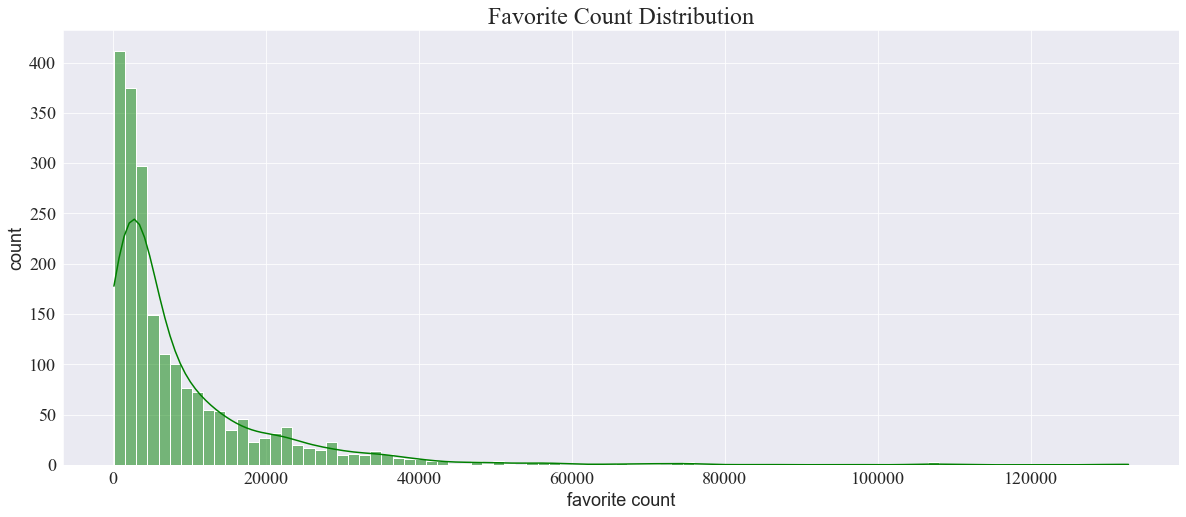

In [12]:
# Plotting a histogram of favorite_count column
_, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=df, x='favorite_count', ax=ax, kde=True, color='green')
plt.xticks(fontsize=18, fontfamily='Times New Roman')
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('favorite count', fontdict={'fontsize':18})
plt.ylabel('count', fontdict={'fontsize':18})
plt.title('Favorite Count Distribution', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

From the plot above, the favorite count distribution is right skewed.This suggests that tweets which had a very large number of likes were not so many. It also suggests that more tweets are likely to be found to have lower number of likes below 20,000.
This distribution also shows that most tweets had number of likes to be less than 5000.

### Which dog stage is most common?

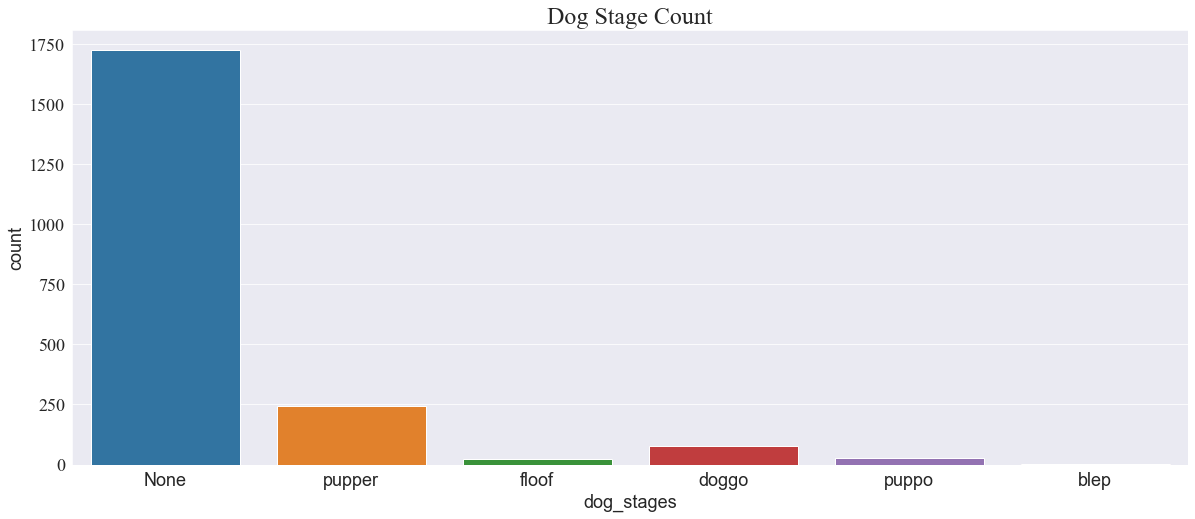

In [13]:
_, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df, x='dog_stages', ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('dog_stages', fontdict={'fontsize':18})
plt.ylabel('count', fontdict={'fontsize':18})
plt.title('Dog Stage Count', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

From the plot above, we can see that most tweets did not specify the dog stage, then out of tweets that specified the dog stage, the pupper stage is the most common dog stage.
This plot suggests that most tweets don't contain the dog stage of the dog. The plot also shows that there were five stages of dog detected from the tweets which are
1. pupper<br>
2. floof<br>
3. doggo<br>
4. puppo<br>
5. blep<br>

### Which breed of dog is most common?

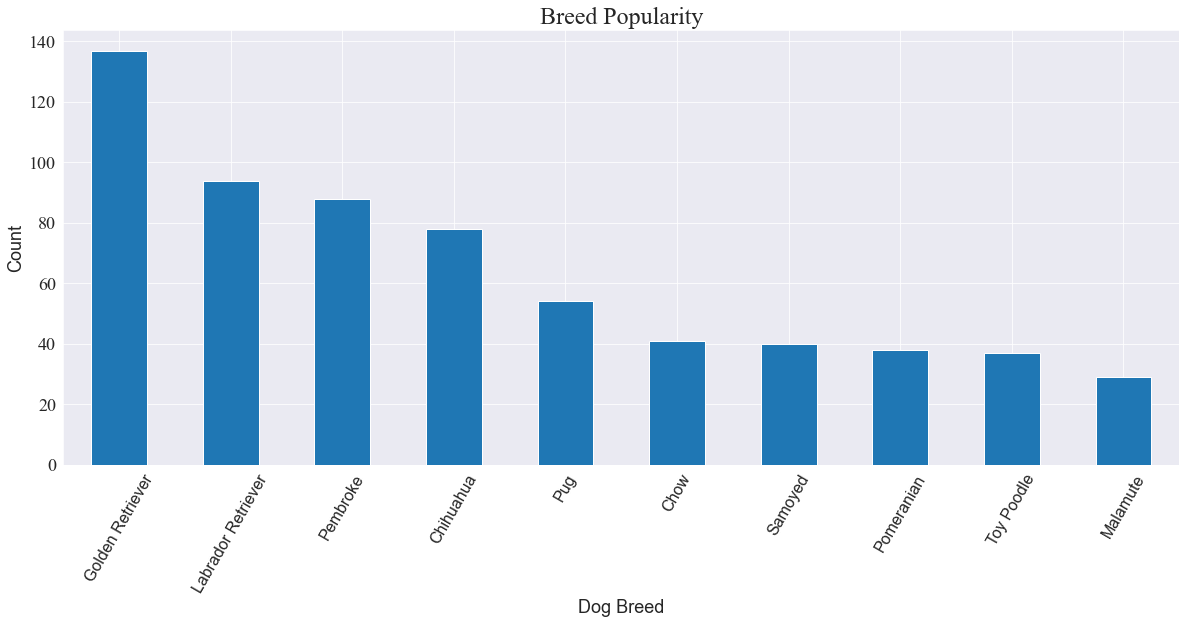

In [14]:
pred_counts = df['p1'].value_counts()
pred_counts.pop('No Image')
pred_counts[:10].plot(kind='bar', figsize=(20,8))
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('Dog Breed', fontdict={'fontsize': 18})
plt.ylabel('Count', fontdict={'fontsize': 18})
plt.title('Breed Popularity', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

From the plot above, the most common breeds of dog tweeted about are;
- Golden Retriever
- Labrador Retriever
- Pembroke
- Chihuahua
- Pug
- Chow
- Samoyed
- Toy Poodle
- Pome

In [15]:
df['p1_dog'].value_counts()

True     1463
False     634
Name: p1_dog, dtype: int64

From the information above, we can see that not all the images were classified as dogs.
In fact the number of images not classified as dogs is more than half of the number of images classified as dogs.
This most likely suggests that not all of the tweets are about dogs. 

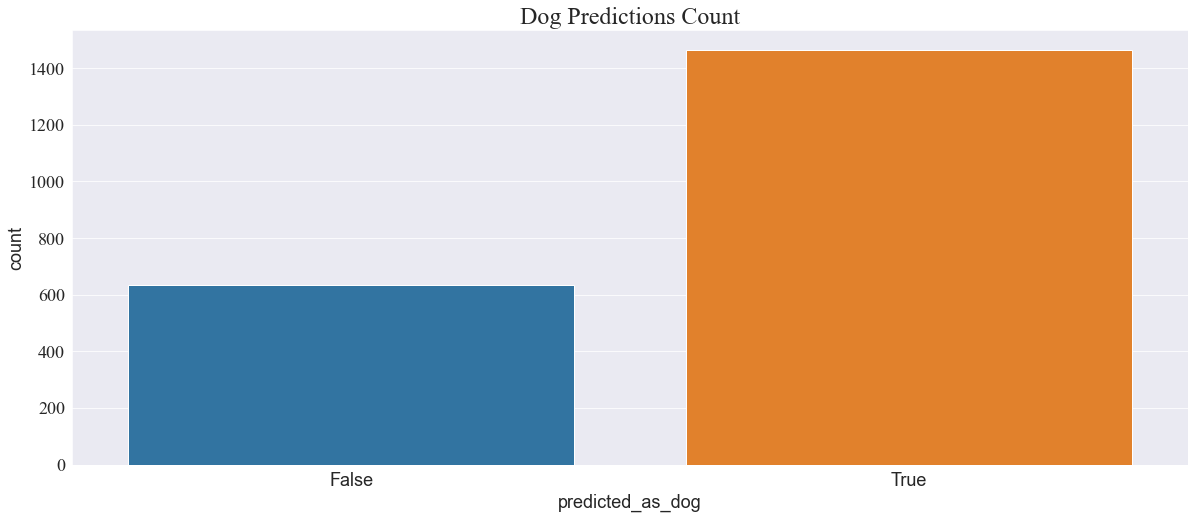

In [16]:
_, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df, x='p1_dog', ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('predicted_as_dog', fontdict={'fontsize':18})
plt.ylabel('count', fontdict={'fontsize':18})
plt.title('Dog Predictions Count', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

In [17]:
df['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
99        1
84        1
24        1
75        1
27        1
165       1
1776      1
204       1
50        1
26        1
80        1
45        1
60        1
44        1
121       1
144       1
88        1
420       1
0         1
Name: rating_numerator, dtype: int64

From the above series, the most common ratings are usually between between 3 and 14

In [18]:
# Making a column for usual and unusual ratings 

def classify_rating(r):
    return 'Usual' if r in range(3, 15) else 'Unusual'

In [19]:
df['rating_numerator_classified'] = df['rating_numerator'].apply(classify_rating)
df['rating_denominator_classified'] = df['rating_numerator'].apply(classify_rating)

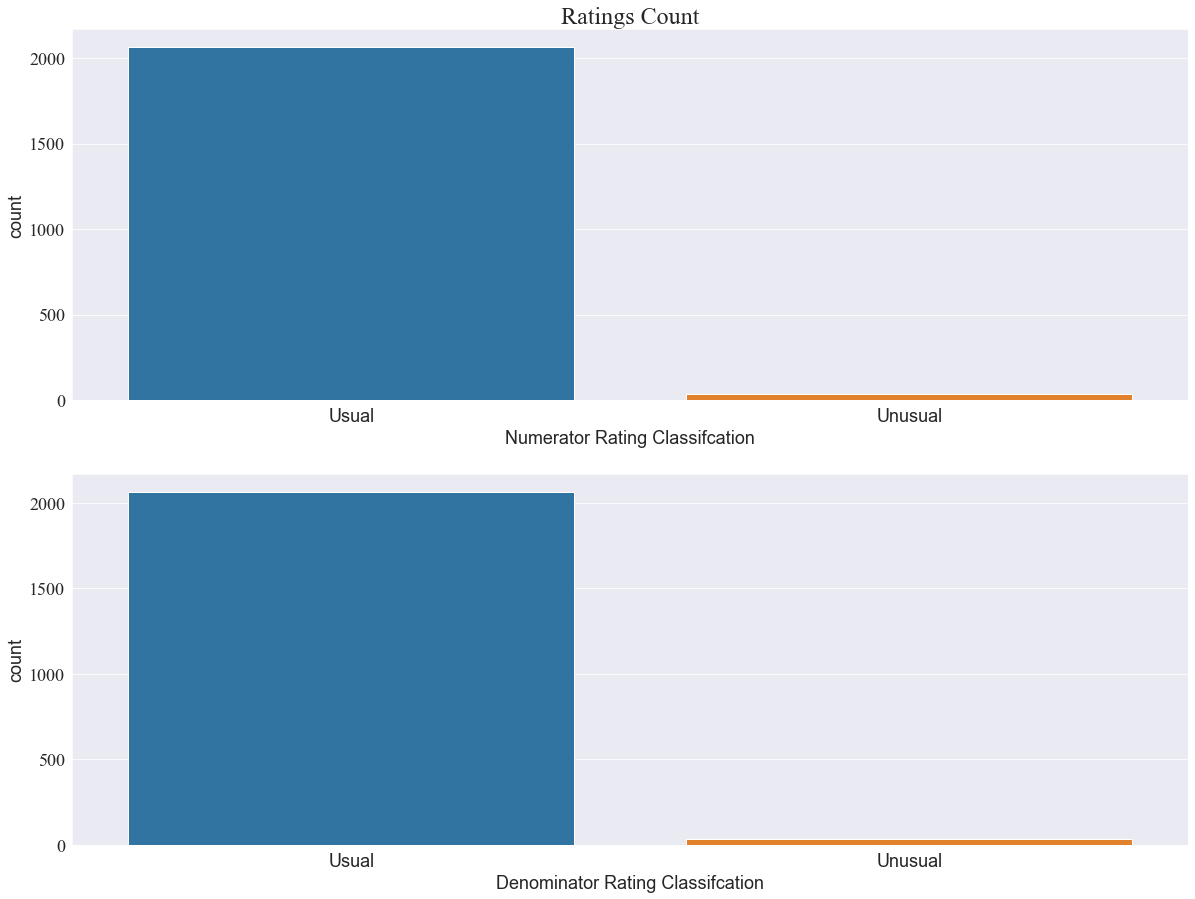

In [20]:
_, ax = plt.subplots(figsize=(20,15), nrows=2)
sns.countplot(data=df, x='rating_numerator_classified', ax=ax[0])
sns.countplot(data=df, x='rating_denominator_classified', ax=ax[1])

rating_class = ['Numerator', 'Denominator']

ax[0].set_title('Ratings Count', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
for i, x in enumerate(ax):
    x.set_xticks([0, 1], labels=['Usual', 'Unusual'], fontsize=18)
    x.set_yticks([*range(0,2001,500)], labels=[*range(0,2001,500)], fontsize=18, fontfamily='Times New Roman')
    x.set_xlabel(f'{rating_class[i]} Rating Classifcation', fontdict={'fontsize':18})
    x.set_ylabel('count', fontdict={'fontsize':18})
plt.show()

In both plots, the unusual rating types are far less common to the usual rating types

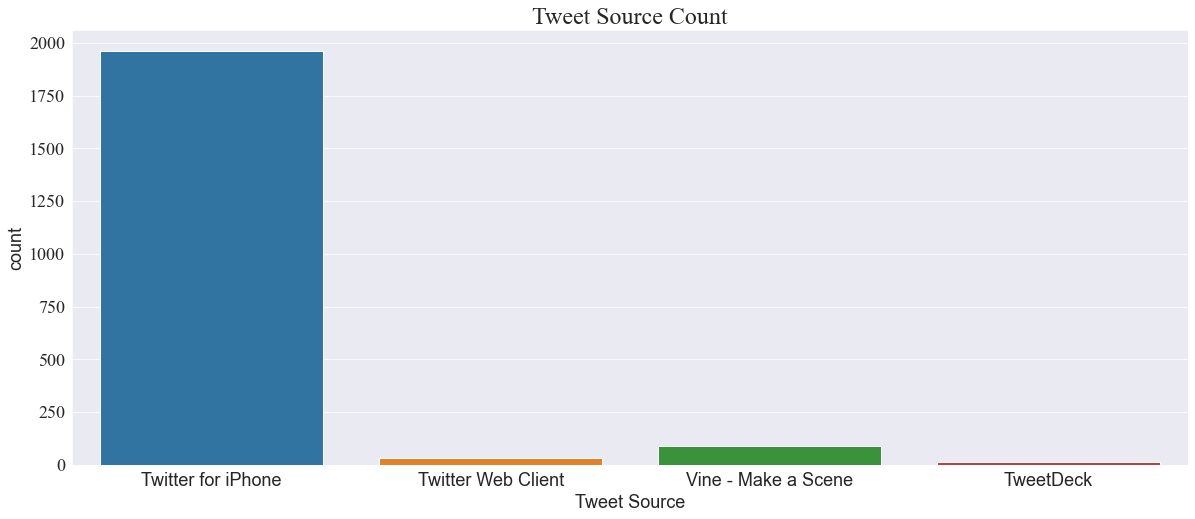

In [21]:
_, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df, x='source', ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('Tweet Source', fontdict={'fontsize':18})
plt.ylabel('count', fontdict={'fontsize':18})
plt.title('Tweet Source Count', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

From the plot above, most of the dog owners use iPhone.

In [22]:
df['source'].value_counts() / len(df)

Twitter for iPhone     0.936576
Vine - Make a Scene    0.043395
Twitter Web Client     0.014783
TweetDeck              0.005246
Name: source, dtype: float64

About an amazing 94% of tweeters use iPhone.

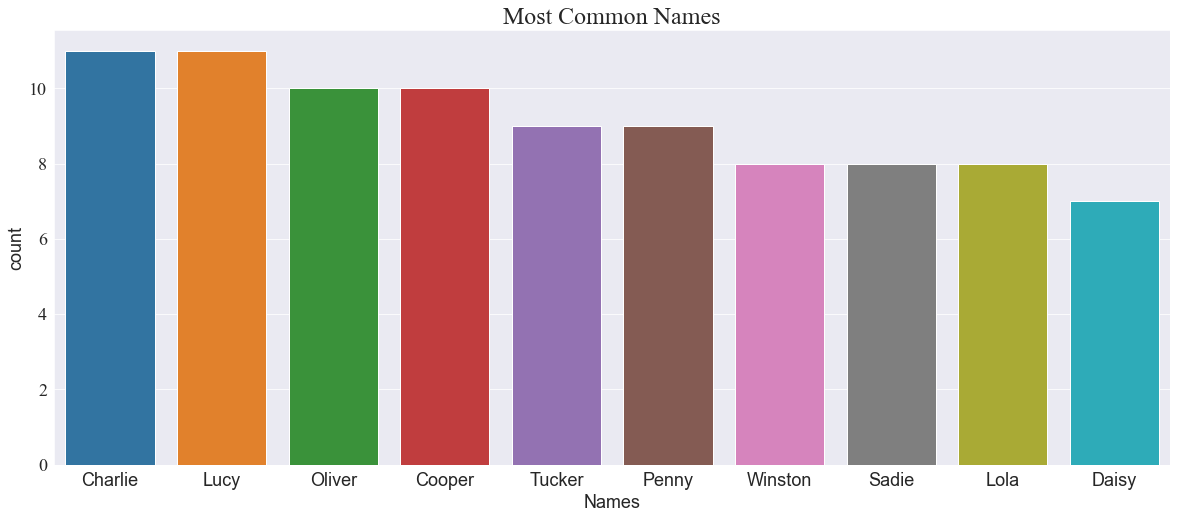

In [23]:
_, ax = plt.subplots(figsize=(20,8))
sns.barplot(x=df['name'].value_counts()[1:11].keys(), y=df['name'].value_counts()[1:11].values, ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, fontfamily='Times New Roman')
plt.xlabel('Names', fontdict={'fontsize':18})
plt.ylabel('count', fontdict={'fontsize':18})
plt.title('Most Common Names', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'})
plt.show()

From the plot above, most dog owners name their dog 'Charlie`.